# Plateforme Agnostique de Traitement et d'Analyse des Textes
### Carnet d'expérimentation
---

## Sujet : Barometre

---

# Imports

In [1]:
cd ../..

/Volumes/Geek/Work/Patat


In [2]:
import importlib
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
tqdm.pandas()

# Chargement et parsing pages

In [3]:
import patat.util.gsheet

gs = patat.util.gsheet.GoogleSheet()

sheet_id = '1tPfJj7E8UbgRTU1dSYRSz77wCa_SNORUJmwnHjQmaEc'
range_name = 'LesMoutonsRebelles2022'

df_url_mou = gs.read_df(sheet_id,range_name)

range_name = 'LeMediaEn442 2022'

df_url_442 = gs.read_df(sheet_id,range_name)

df_url=pd.concat([df_url_mou,df_url_442])

range_name = 'Polemia2022'

df_url_polemia = gs.read_df(sheet_id,range_name)

df_url=pd.concat([df_url_polemia,df_url])



In [4]:
df_url

,id,date,url
0,0,2022-01-03,https://www.polemia.com/docteur-serbera-sur-le...
1,1,2022-01-05,https://www.polemia.com/jean-yves-le-gallou-la...
2,2,2022-01-05,https://www.polemia.com/gabriel-attal-et-steph...
3,3,2022-01-05,https://www.polemia.com/macron-veut-emmerder-l...
4,4,2022-01-06,https://www.polemia.com/quand-les-sons-et-la-m...
...,...,...,...
2321,2321,2022-12-31,https://lemediaen442.fr/jesuisterreau-que-fair...
2322,2322,2022-12-31,https://lemediaen442.fr/elisabeth-levy-lobliga...
2323,2323,2022-12-31,https://lemediaen442.fr/la-politologue-anastas...
2324,2324,2022-12-31,https://lemediaen442.fr/le-pape-emerite-benoit...


In [5]:
import patat.imp.importer
import patat.imp.parser

In [6]:
importlib.reload(patat.imp.parser)

<module 'patat.imp.parser' from '/Volumes/Geek/Work/Patat/patat/imp/parser.py'>

In [7]:
imp = patat.imp.importer.Importer()
parser = patat.imp.parser.Parser()

In [8]:
parse_data = []
for index,row in df_url.iterrows():
    url = row['url']
    print(index,url)
    html = imp.get_webpage(url)
    data = parser.parse_article_selector(url,html,imp.get_site(url))
    data['sm_date_text']=row['date']
    parse_data.append(data)

0 https://www.polemia.com/docteur-serbera-sur-le-covid-19-je-nai-aucune-explication-a-cette-folie/
1 https://www.polemia.com/jean-yves-le-gallou-la-violence-est-inseparable-de-la-politique-nen-deplaise-aux-bisounours/
2 https://www.polemia.com/gabriel-attal-et-stephane-sejourne-tandem-dinfluence-pour-macron/
3 https://www.polemia.com/macron-veut-emmerder-les-non-vaccines-un-tournant-totalitaire-effrayant/
4 https://www.polemia.com/quand-les-sons-et-la-musique-permettent-de-controler-les-foules/
5 https://www.polemia.com/covid-19-ultracrepidarianisme-carton-rouge-aux-journalistes-et-medecins-mediatiques/
6 https://www.polemia.com/en-2022-face-a-la-tyrannie-il-faudra-rester-debout/
7 https://www.polemia.com/droite-gauche-extreme-centre-et-presidentielle-entretien-avec-jean-yves-le-gallou/
8 https://www.polemia.com/le-post-europeiste-macron-promoteur-dune-europe-post-europeenne/
9 https://www.polemia.com/fascisme-retour-sur-un-terme-en-vogue/
10 https://www.polemia.com/parrainages-suffrag

95 https://www.polemia.com/ukraine-leurope-doit-se-desolidariser-des-americains-par-bruno-megret/
96 https://www.polemia.com/immigration-le-directeur-de-frontex-jette-leponge-les-no-border-jubilent/
97 https://www.polemia.com/abandon-du-nucleaire-et-hausse-de-leolien-la-transition-energetique-allemande-critiquee/
98 https://www.polemia.com/voyage-au-bout-de-lenfer-occidental-avec-le-dernier-essai-de-jean-claude-rolinat/
99 https://www.polemia.com/lere-de-legoisme-comment-le-neoliberalisme-la-emporte/
100 https://www.polemia.com/immigration-lheure-des-comptes-un-ouvrage-dense-sur-le-cout-de-limmigration/
101 https://www.polemia.com/la-fermete-danoise-sur-limmigration-vantee-par-laurent-wauquiez-lr/
102 https://www.polemia.com/la-reelection-demmanuel-macron-vue-dallemagne-vers-un-ordre-mondial-ouvert/
103 https://www.polemia.com/excision-france-terre-dasile-ou-de-dangers-pour-les-femmes-menacees/
104 https://www.polemia.com/quelques-conseils-de-lecture-en-ces-temps-difficiles-par-jean-yv

192 https://www.polemia.com/lci-chaine-de-propagande-ukrainienne-en-continu/
193 https://www.polemia.com/lanalyse-de-christopher-lasch-sur-la-fracture-entre-les-elites-progressistes-et-le-peuple/
194 https://www.polemia.com/le-royal-wedding-une-operation-de-propagande-anti-europeenne/
195 https://www.polemia.com/charles-iii-monarque-traditionnel-ou-multiculturel/
196 https://www.polemia.com/delations-excommunications-proscriptions-les-journalistes-contre-la-diversite-dopinion/
197 https://www.polemia.com/depenaliser-le-refus-dobtemperer/
198 https://www.polemia.com/climat-la-grande-peur-de-lan-deux-mille/
199 https://www.polemia.com/toujours-plus-dimmigration-a-prevoir-pendant-le-2e-quinquennat-macron/
200 https://www.polemia.com/tronquer-ce-monde-quils-ne-sauraient-voir/
201 https://www.polemia.com/en-allemagne-le-grand-remplacement-avance-entretien-avec-thilo-sarrazin/
202 https://www.polemia.com/allemagne-entretien-avec-stefan-marzischewski-drewes-candidat-de-lafd-en-basse-saxe/
203

280 https://www.polemia.com/de-quelle-decadence-parle-t-on-retour-sur-le-debat-houellebecq-onfray/
281 https://www.polemia.com/faire-face-aux-persecutions-politiques-par-jean-eudes-gannat-video/
282 https://www.polemia.com/faire-face-au-grand-endoctrinement-scolaire-par-nicolas-demade-video/
283 https://www.polemia.com/quelle-politique-migratoire-pour-la-france-propositions-concretes/
284 https://www.polemia.com/faire-face-aux-persecutions-universitaires-par-jean-luc-coronel-de-boissezon-video/
285 https://www.polemia.com/comment-garder-espoir-face-a-la-repression-par-thais-descufon-video/
286 https://www.polemia.com/democratie-et-etat-de-droit-reprendre-le-pouvoir-par-pierre-gentillet-video/
287 https://www.polemia.com/faire-face-a-la-laideur-par-renaud-camus-forum-de-la-dissidence/
288 https://www.polemia.com/michel-geoffroy-le-systeme-est-ebranle-lheure-est-a-lesperance-video/
289 https://www.polemia.com/qatar-les-penaltys-rates-de-lequipe-mediatique/
290 https://www.polemia.com/dem

57 https://lesmoutonsrebelles.com/pour-eric-clapton-les-personnes-qui-se-font-vacciner-sont-sous-hypnose-de-masse/
58 https://lesmoutonsrebelles.com/macron-avertit-que-la-russie-le-paiera-tres-cher-si-lukraine-venait-a-etre-attaquee/
59 https://lesmoutonsrebelles.com/un-etrange-objet-dans-lespace-emet-des-ondes-radio-toutes-les-18-minutes/
60 https://lesmoutonsrebelles.com/mette-frederiksen-premier-ministre-du-danemark-nous-disons-adieu-aux-restrictions/
61 https://lesmoutonsrebelles.com/canada-le-milliardaire-elon-musk-soutient-les-camionneurs-opposes-a-lobligation-vaccinale-trudeau-se-planque-a-larrivee-des-routiers/
62 https://lesmoutonsrebelles.com/le-ministre-allemand-de-la-sante-les-restrictions-contre-les-non-vaccines-etaient-dues-a-une-erreur-de-logiciel/
63 https://lesmoutonsrebelles.com/la-catalogne-supprime-le-pass-sanitaire-juge-inefficace-face-a-omicron/
64 https://lesmoutonsrebelles.com/lacteur-americain-sean-penn-regrette-que-les-hommes-se-soient-feminises/
65 https://le

134 https://lesmoutonsrebelles.com/crise-russo-ukrainienne-il-faut-dire-a-vladimir-poutine-maintenant-cest-stop-lance-valerie-pecresse/
135 https://lesmoutonsrebelles.com/surmortalite-post-vaccinale-des-scientifiques-allemands-sondent-les-statistiques-officielles/
136 https://lesmoutonsrebelles.com/cest-une-campagne-de-merde-jean-lassalle-dezingue-les-autres-candidats/
137 https://lesmoutonsrebelles.com/eric-zemmour-appelle-a-emmanuel-macron-a-se-rendre-a-moscou-et-kiev-pour-obtenir-un-cessez-le-feu-immediat/
138 https://lesmoutonsrebelles.com/a-cet-acte-de-guerre-nous-repondrons-sans-faiblesse-affirme-emmanuel-macron/
139 https://lesmoutonsrebelles.com/les-forces-armees-russes-tentent-de-semparer-de-la-centrale-de-chernobyl/
140 https://lesmoutonsrebelles.com/jean-yves-le-drian-vladimir-poutine-doit-aussi-comprendre-que-lalliance-atlantique-est-une-alliance-nucleaire/
141 https://lesmoutonsrebelles.com/noublions-pas-les-souffrances-le-martyr-la-souffrance-qua-connu-le-peuple-irakien-e

203 https://lesmoutonsrebelles.com/criminel-de-guerre-le-kremlin-juge-impardonnables-les-propos-de-biden-concernant-poutine/
204 https://lesmoutonsrebelles.com/veran-expliquant-linnefficacite-de-ces-propres-mesures-covid-19-pascal-praud-est-mort-de-rire/
205 https://lesmoutonsrebelles.com/maltraitance-sociale-boulet-deni-lopposition-ereinte-le-programme-demmanuel-macron/
206 https://lesmoutonsrebelles.com/larmee-russe-a-utilise-des-missiles-hypersoniques-pour-la-premiere-fois-dans-loperation-speciale/
207 https://lesmoutonsrebelles.com/zelensky-la-troisieme-guerre-mondiale-est-assuree-si-les-negociations-avec-la-russie-echouent/
208 https://lesmoutonsrebelles.com/arrangements-des-merdias-occidentaux-avec-la-verite-un-cas-decole-sur-tf1/
209 https://lesmoutonsrebelles.com/une-cyber-attaque-de-grande-envergure-est-maintenant-imminente/
210 https://lesmoutonsrebelles.com/rafael-nadal-quand-jessaie-de-respirer-cest-douloureux-et-tres-inconfortable/
211 https://lesmoutonsrebelles.com/joe-bi

275 https://lesmoutonsrebelles.com/plus-que-quelques-semaines-avant-le-grand-reset-guerre-mondiale/
276 https://lesmoutonsrebelles.com/nagui-michel-cymes-valerie-damidot-de-tf1-a-m6-la-liste-de-ces-animateurs-qui-appellent-a-voter-pour-emmanuel-macron/
277 https://lesmoutonsrebelles.com/interdiction-du-voile-marine-le-pen-met-de-leau-dans-son-vin/
278 https://lesmoutonsrebelles.com/tatiana-ventose-prefere-voter-le-pen-plutot-que-macron/
279 https://lesmoutonsrebelles.com/lucien-cerise-tout-larsenal-juridique-mis-en-place-par-macron-peut-etre-aneanti-si-on-gagne/
280 https://lesmoutonsrebelles.com/pour-poutine-la-blitzkrieg-economique-a-echoue-et-sest-retournee-contre-les-occidentaux/
281 https://lesmoutonsrebelles.com/presidentielle-le-pere-demmanuel-macron-salue-le-courage-de-son-fils-face-a-des-francais-ingrats/
282 https://lesmoutonsrebelles.com/onfray-ca-me-parait-evident-que-marine-le-pen-nest-pas-dextreme-droite/
283 https://lesmoutonsrebelles.com/quest-ce-que-le-grand-reset-et-q

348 https://lesmoutonsrebelles.com/de-retour-dukraine-adrien-bocquet-raconte-jai-vu-des-crimes-abominables-commis-par-azov/
349 https://lesmoutonsrebelles.com/la-finlande-favorable-a-une-adhesion-a-lotan-sans-delai-malgre-les-mises-en-garde-de-moscou/
350 https://lesmoutonsrebelles.com/un-rapport-du-senat-preconise-dexperimenter-la-reconnaissance-faciale-durant-trois-ans/
351 https://lesmoutonsrebelles.com/13-pays-de-lue-publient-un-texte-contre-macron-et-sa-proposition-de-suppression-du-droit-de-veto/
352 https://lesmoutonsrebelles.com/le-pape-francois-accuse-lotan-davoir-provoque-la-russie-et-souhaite-rencontrer-poutine/
353 https://lesmoutonsrebelles.com/les-soldats-israeliens-attaquent-le-convoi-funebre-de-la-journaliste-dal-jazeera/
354 https://lesmoutonsrebelles.com/la-russie-va-suspendre-a-partir-de-demain-ses-livraisons-delectricite-a-la-finlande-qui-souhaite-rejoindre-lotan/
355 https://lesmoutonsrebelles.com/la-chine-noubliera-jamais-le-bombardement-de-lotan-contre-lambassade

422 https://lesmoutonsrebelles.com/nous-avons-besoin-de-plus-dargent-pour-planifier-la-prochaine-pandemie/
423 https://lesmoutonsrebelles.com/olivier-marleix-qui-a-vote-contre-le-passvaccinal-a-la-tete-du-groupe-lr-a-lassemblee-nationale/
424 https://lesmoutonsrebelles.com/la-derniere-video-du-pr-raoult-est-une-boucherie/
425 https://lesmoutonsrebelles.com/la-cour-supreme-des-etats-unis-revoque-le-droit-a-lavortement/
426 https://lesmoutonsrebelles.com/macron-en-marionnette-dattali-une-fresque-murale-qui-fait-polemique/
427 https://lesmoutonsrebelles.com/la-russie-va-livrer-a-la-bielorussie-des-missiles-capables-de-transporter-des-charges-nucleaires/
428 https://lesmoutonsrebelles.com/elle-ne-sest-pas-tiree-une-balle-dans-la-jambe-avec-cela-mais-dans-la-tete-la-russie-remet-en-question-la-legalite-des-frontieres-de-la-lituanie/
429 https://lesmoutonsrebelles.com/des-milliers-de-personnes-disent-non-a-lotan-a-madrid-ville-hote-de-son-prochain-sommet/
430 https://lesmoutonsrebelles.com/c

500 https://lesmoutonsrebelles.com/des-responsables-taiwanais-declarent-que-pelosi-viendra-certainement-alors-que-la-chine-commence-a-fermer-le-detroit/
501 https://lesmoutonsrebelles.com/leconomiste-martin-armstrong-2023-sera-une-annee-infernale/
502 https://lesmoutonsrebelles.com/poutine-annonce-larrivee-des-premiers-missiles-hypersoniques-zircon-dans-la-marine-russe/
503 https://lesmoutonsrebelles.com/washington-paiera-le-prix-en-cas-de-visite-de-nancy-pelosi-a-taiwan-previent-pekin/
504 https://lesmoutonsrebelles.com/la-rotation-de-la-terre-sest-acceleree-les-scientifiques-perplexes/
505 https://lesmoutonsrebelles.com/video-pour-jacques-attali-avoir-cotoye-tous-les-presidents-depuis-quarante-ans-cest-un-hasard/
506 https://lesmoutonsrebelles.com/patrick-pouyanne-patron-de-total-energie-detruit-la-propagande-du-gouvernement/
507 https://lesmoutonsrebelles.com/emmanuel-macron-insulte-tout-un-continent-lafrique-mais-de-quel-droit/
508 https://lesmoutonsrebelles.com/les-peuples-de-lurs

571 https://lesmoutonsrebelles.com/chinois-bielorusses-indiens-syriens-affluent-en-russie-pour-des-manoeuvres-militaires/
572 https://lesmoutonsrebelles.com/thomas-pesquet-a-t-il-confirme-en-direct-que-personne-na-pose-le-pied-sur-la-lune/
573 https://lesmoutonsrebelles.com/marie-estelle-dupont-la-priorite-du-gouvernement-visiblement-cest-deduquer-un-peu-plus-les-enfants-a-la-transsexualite/
574 https://lesmoutonsrebelles.com/karine-bechet-golovko-crise-energetique-la-russie-est-en-position-de-force/
575 https://lesmoutonsrebelles.com/selon-sandrine-rousseau-certaines-categories-de-personnes-devraient-etre-preservees-du-droit-a-la-caricature-comme-les-personnes-noires-et-les-personnes-lgbt/
576 https://lesmoutonsrebelles.com/dossier-macron-saisi-chez-trump-le-deep-state-fait-il-chanter-notre-president/
577 https://lesmoutonsrebelles.com/morbihan-un-vacancier-demande-larret-des-cloches-de-leglise-qui-lempechent-de-dormir/
578 https://lesmoutonsrebelles.com/argentine-la-vice-presidente-c

642 https://lesmoutonsrebelles.com/attal-sur-de-lui-meme-et-dominateur-nous-ferons-la-reforme-des-retraites/
643 https://lesmoutonsrebelles.com/vladimir-poutine-a-accorde-la-nationalite-russe-au-lanceur-dalerte-edward-snowden/
644 https://lesmoutonsrebelles.com/michel-onfray-sur-les-propos-de-giorgia-meloni-sur-leurope-a-chaque-fois-quon-critique-leurope-on-est-considere-comme-un-nazi/
645 https://lesmoutonsrebelles.com/lex-president-de-greenpeace-le-changement-climatique-cest-pour-effrayer-les-gens-afin-de-les-controler-et-faire-de-largent/
646 https://lesmoutonsrebelles.com/bruno-le-maire-assure-quil-ne-portera-plus-de-cravates-mais-des-cols-roules-afin-de-faire-des-economies/
647 https://lesmoutonsrebelles.com/sabotage-de-nord-stream-1-et-2-thank-you-usa/
648 https://lesmoutonsrebelles.com/les-etats-unis-demandent-a-leurs-citoyens-de-quitter-immediatement-la-russie/
649 https://lesmoutonsrebelles.com/poutine-leurope-devore-la-nourriture-et-les-expeditions-de-cereales-natteignent-pas

722 https://lesmoutonsrebelles.com/le-president-biden-sassoupit-en-plein-milieu-dune-interview-ou-il-annonce-sa-candidature-pour-2024/
723 https://lesmoutonsrebelles.com/gaza-existe-gaza-resiste-free-palestine-tensions-lors-du-match-psg-maccabi-haifa/
724 https://lesmoutonsrebelles.com/macron-demande-au-pape-dappeler-poutine-et-biden/
725 https://lesmoutonsrebelles.com/quelles-catastrophes-nous-prepare-encore-zelensky/
726 https://lesmoutonsrebelles.com/macron-sur-lelectricite-et-le-gaz-il-va-y-avoir-une-hausse-de-15-mais-elle-aurait-du-etre-de-100/
727 https://lesmoutonsrebelles.com/elon-musk-fait-son-entree-au-siege-de-twitter-un-lavabo-a-la-main/
728 https://lesmoutonsrebelles.com/les-defiles-homosexuels-quils-occidentaux-les-fassent-chez-eux-mais-pas-chez-les-autres-vladimir-poutine/
729 https://lesmoutonsrebelles.com/vladimir-poutine-le-monde-entre-dans-la-decennie-la-plus-dangereuse-depuis-1945/
730 https://lesmoutonsrebelles.com/kanye-west-persiste-et-signe-les-gens-que-vous-eco

790 https://lesmoutonsrebelles.com/la-mascotte-revolutionnaire-grotesque-des-jo-2024-a-paris/
791 https://lesmoutonsrebelles.com/pedopornographie-48-hommes-dont-plusieurs-elus-interpelles-en-france/
792 https://lesmoutonsrebelles.com/le-parlement-europeen-commence-a-sinquieter-des-activites-douteuses-du-mari-de-von-der-leyen/
793 https://lesmoutonsrebelles.com/missile-sur-la-pologne-le-president-ukrainien-volodymyr-zelensky-fait-marche-arriere-et-affirme-desormais-ne-pas-savoir-ce-quil-sest-passe/
794 https://lesmoutonsrebelles.com/les-fausses-infos-sur-lukraine-risquent-de-declencher-une-guerre-mondiale-insiste-segolene-royal/
795 https://lesmoutonsrebelles.com/il-y-a-beaucoup-de-mosquees-a-repondu-jacques-vendroux-a-pascal-praud-tout-juste-arrive-a-doha/
796 https://lesmoutonsrebelles.com/eric-denece-specialiste-du-renseignement-zelensky-exaspere-tout-le-monde-y-compris-biden-et-macron/
797 https://lesmoutonsrebelles.com/twitter-elon-musk-lance-un-sondage-pour-reintegrer-ou-pas-donal

860 https://lesmoutonsrebelles.com/prix-de-lelectricite-un-boulanger-en-liquidation-judiciaire-alors-que-son-carnet-de-commandes-est-plein-a-craquer/
861 https://lesmoutonsrebelles.com/vous-etes-la-honte-de-la-france-anne-hidalgo-prise-a-partie-par-un-passant-a-paris/
862 https://lesmoutonsrebelles.com/loccident-semble-sacheminer-doucement-vers-une-negociation-avec-les-russes/
863 https://lesmoutonsrebelles.com/francois-asselineau-sur-lechec-du-nouvel-ordre-mondial/
864 https://lesmoutonsrebelles.com/8-boulangeries-francaises-sur-10-pourraient-disparaitre-en-2023/
865 https://lesmoutonsrebelles.com/christophe-dechavanne-en-colere-demande-le-retour-du-masque-obligatoire-quest-ce-que-vous-attendez-les-gens-meurent-a-nouveau/
866 https://lesmoutonsrebelles.com/avec-7-milliards-deuros-de-dettes-paris-peut-elle-encore-soutenir-financierement-ces-2600-associations-aux-missions-parfois-tres-eloignees-du-quotidien-des-parisiens/
867 https://lesmoutonsrebelles.com/eric-zemmour-comment-reagiraie

16 https://lemediaen442.fr/le-pr-claverie-le-vaccin-pfizer-une-escroquerie-et-la-troisieme-dose-ne-sert-a-rien/
17 https://lemediaen442.fr/un-journaliste-de-lci-malmene-devant-lassemblee-nationale-on-devrait-vous-peter-la-gueule-journaleux-de-merde/
18 https://lemediaen442.fr/lanalyse-du-psychiatre-italien-adriano-segatori-macron-est-un-psychopathe/
19 https://lemediaen442.fr/dr-toubiana-nous-sommes-aujourdhui-dans-une-epidemie-relativement-banale/
20 https://lemediaen442.fr/kareem-de-ragnarock-le-president-declare-la-guerre-au-peuple-francais/
21 https://lemediaen442.fr/david-pujadas-persiste-et-signe-les-medias-entretiennent-un-climat-de-peur/
22 https://lemediaen442.fr/stefan-cuvelier-se-la-joue-gainsbarre-requiem-pour-des-c/
23 https://lemediaen442.fr/alexandra-henrion-caude-devons-nous-faire-vacciner-nos-enfants/
24 https://lemediaen442.fr/pass-vaccinal-lassemblee-nationale-valide-le-projet-de-loi/
25 https://lemediaen442.fr/macron-te-meprise-sors-de-chez-toi/
26 https://lemediaen

94 https://lemediaen442.fr/leclerc-se-dit-pret-a-interdire-lentree-de-ses-supermarches-aux-non-vaccines/
95 https://lemediaen442.fr/pendant-les-nouvelles-lois-scelerates-du-conseil-de-defense-les-affaires-continuent/
96 https://lemediaen442.fr/1977-alfred-et-alberd-se-souviennent-des-noels-heureux-dantan/
97 https://lemediaen442.fr/marcel-d-joyeux-noel-a-tous-en-musique/
98 https://lemediaen442.fr/mal-traites-le-documentaire-choc-sur-la-covid-19/
99 https://lemediaen442.fr/sans-test-negatif-la-ministre-amelie-de-montchalin-debarquee-du-vol-af-1342/
100 https://lemediaen442.fr/pedagogie-innovante-pas-de-masque-pas-de-scolarite/
101 https://lemediaen442.fr/bruno-bonnell-si-on-veut-retrouver-une-vie-normale-il-faut-quon-eradique-la-population/
102 https://lemediaen442.fr/la-chambre-des-lords-contraindre-a-la-vaccination-covid-nest-pas-justifie/
103 https://lemediaen442.fr/le-joueur-de-basket-richard-harward-arrete-sa-saison-suite-a-des-problemes-cardiaques-dus-au-vaccin/
104 https://lemed

178 https://lemediaen442.fr/desobeissance-civile-le-restaurateur-christophe-wilson-sert-ses-clients/
179 https://lemediaen442.fr/covid-19-un-collectif-de-2000-medecins-propose-des-solutions-pour-une-autre-gestion-de-la-crise/
180 https://lemediaen442.fr/precarite-depression-tous-les-soirs-les-distributions-alimentaires-pour-etudiants-prises-dassaut-a-paris/
181 https://lemediaen442.fr/chifoumi-emmanuel-macron-hesite-entre-trois-nuances-de-reconfinement/
182 https://lemediaen442.fr/restrictions-confinement-en-israel-et-aux-pays-bas-les-emeutes-eclatent-partout/
183 https://lemediaen442.fr/marcel-les-70-millions-de-francais-procureurs-vont-ils-se-faire-vacciner/
184 https://lemediaen442.fr/faux-malades-lits-fantomes-les-faux-chiffres-du-coronavirus/
185 https://lemediaen442.fr/karl-zero-au-defi-de-la-verite-manifeste-contre-la-pedocriminalite-en-france/
186 https://lemediaen442.fr/christophe-barbier-je-suis-pour-le-passeport-vaccinal-et-je-vois-bien-que-cest-discriminant/
187 https://lem

256 https://lemediaen442.fr/26-decembre-2020-recours-du-pr-christian-perronne-contre-la-decision-illegale-de-lap-hp/
257 https://lemediaen442.fr/france-soir-publie-une-lettre-a-destination-des-journalistes-francais/
258 https://lemediaen442.fr/1979-jacques-attali-devoile-avec-satisfaction-la-dictature-sanitaire-et-son-passeport-pour-circuler-librement/
259 https://lemediaen442.fr/les-francais-sont-de-moins-en-moins-nombreux-a-vouloir-se-faire-vacciner-contre-le-covid-19/
260 https://lemediaen442.fr/le-masque-obligatoire-en-ariege-est-juge-illegal-par-le-tribunal-administratif-de-toulouse/
261 https://lemediaen442.fr/haex-vous-presente-son-nouveau-titre-noel/
262 https://lemediaen442.fr/pr-didier-raoult-nous-avons-le-droit-detre-intelligents/
263 https://lemediaen442.fr/olivier-veran-decouvre-que-le-covid-a-mute-alors-que-raoult-lexplique-depuis-des-mois/
264 https://lemediaen442.fr/alaska-un-travailleur-de-la-sante-a-une-reaction-allergique-grave-au-vaccin-contre-le-coronavirus/
265 ht

340 https://lemediaen442.fr/sebastien-recchia-message-a-tous-ceux-qui-se-demandent-ou-je-suis-passe/
341 https://lemediaen442.fr/vaccin-anti-covid-dapres-les-recherches-du-pr-bridle-la-proteine-spike-savere-dangereuse-pour-lhomme/
342 https://lemediaen442.fr/obligation-vaccinale-aux-etats-unis-24-etats-menacent-de-poursuivre-biden-en-justice/
343 https://lemediaen442.fr/italie-obligation-vaccinal-pour-tous-les-tensions-montent/
344 https://lemediaen442.fr/sebastien-recchia-la-culture-bachelot-et-les-collabo-awards/
345 https://lemediaen442.fr/lue-autorise-a-nouveau-les-farines-animales-sauf-pour-les-bovins/
346 https://lemediaen442.fr/le-redacteur-en-chef-du-magazine-forbes-rejette-lobligation-vaccinale-de-joe-biden/
347 https://lemediaen442.fr/les-medias-attaquent-le-pr-raoult-chapitre-3-le-traitement-a-lhydroxychloroquine/
348 https://lemediaen442.fr/apres-lexpulsion-de-djokovic-daustralie-la-serbie-expulse-la-societe-australienne-rio-tinto-5-milliards-de-perte/
349 https://lemediaen

418 https://lemediaen442.fr/mckinsey-paie-596-millions-de-dollars-pour-500-000-americains-morts-dusage-abusif-dopioides/
419 https://lemediaen442.fr/pilotes-hotesses-et-stewards-selevent-contre-le-pass-vaccinal-et-deposent-un-recours-devant-le-conseil-detat/
420 https://lemediaen442.fr/gerard-kierzek-le-pass-vaccinal-est-maintenu-pour-etre-leve-juste-avant-les-elections/
421 https://lemediaen442.fr/au-coeur-de-lhistoire-lemir-abdelkader-un-amoureux-de-la-france/
422 https://lemediaen442.fr/les-routiers-canadiens-roulent-vers-la-capitale-ottawa-contre-le-pass-vaccinal/
423 https://lemediaen442.fr/le-directeur-de-lhopital-dichilov-80-des-cas-graves-de-covid-sont-entierement-vaccines/
424 https://lemediaen442.fr/un-journaliste-dassociated-press-compare-l-invasion-russe-de-lukraine-au-mensonge-des-armes-de-destruction-massive-en-irak/
425 https://lemediaen442.fr/infirmiere-suspendue-stephanie-vit-du-rsa-pour-me-nourrir-je-vais-chercher-des-paniers-repas/
426 https://lemediaen442.fr/pfizer-

499 https://lemediaen442.fr/marie-23-ans-me-voila-desactivee-je-suis-desormais-une-sous-citoyenne-qui-na-plus-acces-aux-loisirs-et-transports/
500 https://lemediaen442.fr/une-etude-revele-que-le-risque-cardiaque-est-133-fois-plus-eleve-pour-les-adolescents-apres-le-vaccin-pfizer/
501 https://lemediaen442.fr/olivier-veran-se-dit-pret-a-appuyer-sur-un-bouton-pour-remettre-le-pass-vaccinal-a-la-rentree/
502 https://lemediaen442.fr/diffamation-le-pr-jean-francois-toussaint-fait-condamner-liberation/
503 https://lemediaen442.fr/decu-que-omicron-soit-meilleur-que-les-vaccins-bill-gates-annonce-le-prochain-virus-avec-ses-nouveaux-vaccins-en-6-mois/
504 https://lemediaen442.fr/fabien-linguagrossa-37-ans-militaire-preparateur-physique-fait-une-myocardite-apres-son-vaccin-pfizer/
505 https://lemediaen442.fr/stefan-cuvelier-le-retour-de-croisade-contre-les-menteurs/
506 https://lemediaen442.fr/apres-setre-plaint-de-harcelement-le-tiktokeur-benjamin-ledig-retourne-se-tremousser-dans-une-eglise/
50

578 https://lemediaen442.fr/francois-sureau-les-temps-sont-toujours-difficiles-pour-ceux-qui-naiment-pas-la-liberte/
579 https://lemediaen442.fr/le-youtubeur-la-menace-endosse-un-drapeau-russe-en-plein-centre-ville/
580 https://lemediaen442.fr/gettr-denonce-la-suspension-des-comptes-de-campagne-de-marine-le-pen-et-eric-zemmour-par-twitter/
581 https://lemediaen442.fr/le-president-ukrainien-zelensky-se-cache-dans-lambassade-des-etats-unis-en-pologne-selon-un-depute-dukraine/
582 https://lemediaen442.fr/la-city-et-wall-street-jouent-le-sort-du-monde-en-ukraine/
583 https://lemediaen442.fr/romain-bessonnet-les-occidentaux-ont-viole-le-droit-international-a-plusieurs-reprises-les-russes-ne-croient-plus-aux-beaux-discours/
584 https://lemediaen442.fr/anne-laure-bonnel-lukraine-bombarde-sa-propre-population-depuis-huit-ans-et-il-y-a-eu-13-000-morts/
585 https://lemediaen442.fr/charles-gave-sur-les-sanctions-occidentales-la-russie-peut-vivre-en-autarcie-pendant-deux-ans-nous-deux-mois/
586 ht

658 https://lemediaen442.fr/une-femme-medecin-suspendue-a-decide-de-recueillir-le-temoignage-de-ses-collegues/
659 https://lemediaen442.fr/on-nous-met-le-pistolet-sur-la-tempe-quatre-soignants-temoignent/
660 https://lemediaen442.fr/ukraine-3-oligarques-juifs-proches-de-poutine-demissionnent-du-genesis-group/
661 https://lemediaen442.fr/alors-que-rafael-nadal-se-plaint-davoir-du-mal-a-respirer-novak-djokovic-redevient-numero-1-mondial/
662 https://lemediaen442.fr/le-medecin-ukrainien-gennadiy-druzenko-a-donne-lordre-de-castrer-tous-les-cafards-de-prisonniers-russes/
663 https://lemediaen442.fr/le-general-francais-michel-yakovleff-incite-a-une-guerre-directe-contre-les-russes-en-ukraine/
664 https://lemediaen442.fr/marco-mouly-revele-que-eric-zemmour-a-finance-sa-campagne-avec-largent-sale-de-larnaque-a-la-taxe-carbone-700-000-e/
665 https://lemediaen442.fr/marioupol-nikolai-raconte-face-camera-les-crimes-des-combattants-du-regiment-neo-nazi-azov/
666 https://lemediaen442.fr/double-vict

729 https://lemediaen442.fr/loriginale-k-je-refuse-les-concerts-devant-des-gens-masques/
730 https://lemediaen442.fr/journal-de-bord-de-maud-enseignante-en-cfa-qui-na-jamais-porte-de-masque/
731 https://lemediaen442.fr/entretien-avec-leff-une-ong-qui-se-bat-pour-la-protection-des-libertes-sur-internet/
732 https://lemediaen442.fr/un-notre-monde-entretien-avec-linda-rigaudeau-et-marie-misura-candidates-aux-elections-regionales-dans-les-pays-de-la-loire/
733 https://lemediaen442.fr/victor-nous-les-jeunes-avons-ete-endormis-par-une-societe-de-service-de-divertissement/
734 https://lemediaen442.fr/hk-jai-limpression-que-nos-dirigeants-senferment-dans-une-logique-totalitaire/
735 https://lemediaen442.fr/labbe-la-vaccination-finale-est-liee-par-une-chaine-du-mal-a-laquelle-on-ne-doit-absolument-pas-participer/
736 https://lemediaen442.fr/youtube-nous-repond-non-lentretien-avec-le-pr-perronne-ne-peut-vraiment-pas-etre-diffuse/
737 https://lemediaen442.fr/nicole-delepine-le-danger-actuel-nest-

805 https://lemediaen442.fr/le-perou-quand-dans-un-pays-pauvre-on-ajoute-les-sanctions-contre-la-russie-aux-mesures-sanitaires-les-plus-strictes/
806 https://lemediaen442.fr/gerald-michiara-nous-parle-sur-lhistoire-du-sport-les-grecs-anciens-les-jeux-olympiques-jusquau-xxieme-siecle/
807 https://lemediaen442.fr/debrief-du-premier-tour-avec-idriss-aberkane-et-fabrice-di-vizio/
808 https://lemediaen442.fr/un-entretien-qui-decoiffe-avec-pierre-hillard-great-reset-la-bete-est-la/
809 https://lemediaen442.fr/emmanuel-macron-dit-avoir-emmerde-les-non-vaccines-de-maniere-affectueuse/
810 https://lemediaen442.fr/sebastien-recchia-reponse-a-des-champions-les-journalistes/
811 https://lemediaen442.fr/cyril-hanouna-consterne-de-voir-eloise-32-ans-victime-du-vaccin-cest-inadmissible-elle-naurait-pas-du-se-faire-vacciner/
812 https://lemediaen442.fr/papacito-et-baptiste-marchais-decus-par-la-defaite-de-zemmour-veulent-quitter-le-pays/
813 https://lemediaen442.fr/marine-le-pen-sur-le-comportement-de

878 https://lemediaen442.fr/campagne-electorale-dimanche-on-arrete-le-cirque/
879 https://lemediaen442.fr/tatiana-ventose-denonce-la-censure-orchestree-par-la-classe-superieure-elitiste/
880 https://lemediaen442.fr/contre-histoire-du-cinema-500-bobos-contre-des-fachos/
881 https://lemediaen442.fr/juan-branco-gagne-le-proces-intente-par-martin-hirsch/
882 https://lemediaen442.fr/sebastien-recchia-chante-je-suis-a-vomir/
883 https://lemediaen442.fr/stefan-cuvelier-se-moque-des-artistes-qui-font-barrage-depuis-leur-paradis-fiscal/
884 https://lemediaen442.fr/la-cnil-inflige-15-million-damende-a-dedalus-pour-ne-pas-avoir-protege-les-donnees-de-sante-de-500-000-francais/
885 https://lemediaen442.fr/contre-histoire-du-cinema-mckinsey-un-film-de-complot-ideal/
886 https://lemediaen442.fr/thomas-roper-les-ukrainiens-de-lest-ont-peur-que-les-russes-repartent/
887 https://lemediaen442.fr/igor-kirillov-general-russe-les-etats-unis-et-lotan-preparent-une-attaque-chimique-ou-nucleaire-pour-accuser-

952 https://lemediaen442.fr/xavier-moreau-bulletin-n82-le-gamelin-du-jour-le-general-burkhard-6-mai-2022/
953 https://lemediaen442.fr/pr-didier-raoult-pfizer-a-eu-un-chiffre-daffaires-equivalent-au-pib-de-la-nouvelle-zelande-en-2021/
954 https://lemediaen442.fr/emmanuel-todd-leurope-est-peut-etre-allee-chercher-sa-mort-en-ukraine/
955 https://lemediaen442.fr/le-president-xi-jinping-confine-shanghai-une-mesure-sanitaire/
956 https://lemediaen442.fr/hausse-de-la-mortalite-infantile-linserm-pointe-la-responsabilite-du-gouvernement/
957 https://lemediaen442.fr/urgent-des-officiers-superieurs-americains-francais-et-britanniques-sont-a-azovstal/
958 https://lemediaen442.fr/nicolas-pezeril-guide-du-neo-rural-et-permaculture/
959 https://lemediaen442.fr/episode-6-le-cercle-intime-tete-a-tete-avec-christophe-dettinger/
960 https://lemediaen442.fr/les-sanctions-europeennes-benefiques-le-pib-de-la-russie-bat-des-records-il-na-jamais-ete-aussi-florissant/
961 https://lemediaen442.fr/ils-sont-ouver

1029 https://lemediaen442.fr/marcel-d-philippe-etchebest-cette-grande-gueule-couilles-molles/
1030 https://lemediaen442.fr/alexis-kohler-annonce-la-composition-du-gouvernement-borne-veran-fera-le-cafe/
1031 https://lemediaen442.fr/pr-didier-raoult-les-deux-ministres-qui-me-harcelaient-sen-vont-donc-je-suis-content/
1032 https://lemediaen442.fr/grace-aux-ukrainiens-stefan-a-trouve-un-travail-pour-josie/
1033 https://lemediaen442.fr/moscou-interdit-lentree-en-russie-a-963-americains-dont-joe-biden-et-la-vice-presidente-kamala-harris/
1034 https://lemediaen442.fr/le-president-bolsonaro-declare-que-le-bresil-ne-signera-pas-le-traite-de-loms-sur-la-pandemie/
1035 https://lemediaen442.fr/apres-lelectricite-la-russie-coupe-le-gaz-a-la-finlande-pour-non-paiement-en-roubles/
1036 https://lemediaen442.fr/josh-owens-pourquoi-leconomie-russe-ne-sest-pas-effondree-sous-le-poids-des-sanctions/
1037 https://lemediaen442.fr/lancien-officier-de-la-cia-philip-giraldi-alerte-sur-une-famine-massive/
1038 

1101 https://lemediaen442.fr/interview-de-pascal-davoz-candidat-aux-elections-legislatives-2022-sous-la-banniere-ensemble-pour-les-libertes-de-martine-wonner/
1102 https://lemediaen442.fr/le-petit-theatre-des-operations-casabianca-le-sous-marin-qui-a-sauve-lhonneur-de-la-marine-en-1942/
1103 https://lemediaen442.fr/serguei-lavrov-ministre-russe-le-president-macron-alimente-le-neonazisme-ukrainien-et-nous-sommes-triste-de-le-constater/
1104 https://lemediaen442.fr/trucs-et-astuces-dyves-calvi-sur-bfmtv-afin-de-vous-prepare-a-linflation-ne-pas-faire-ses-courses-quand-on-a-faim/
1105 https://lemediaen442.fr/sebastien-recchia-qui-sont-ils-ceux-qui-nous-incitent-a-nous-faire-injecter/
1106 https://lemediaen442.fr/katarina-barley-vice-presidente-du-parlement-europeen-veut-retirer-le-droit-de-veto-a-la-hongrie/
1107 https://lemediaen442.fr/quand-laura-laune-et-guillaume-bats-tentent-de-combattre-le-sexisme/
1108 https://lemediaen442.fr/perseverant-dans-la-defaite-manuel-valls-elimine-des-le-1

1173 https://lemediaen442.fr/les-effets-de-la-mission-flash-de-macron-un-enfant-de-4-ans-grievement-blesse-attend-trois-heures-quun-chu-laccepte/
1174 https://lemediaen442.fr/en-panique-totale-les-etats-unis-avertissent-linde-des-risques-dune-cooperation-avec-la-russie/
1175 https://lemediaen442.fr/khaled-freak-a-le-rythme-dans-la-peau-faites-vous-vacciner/
1176 https://lemediaen442.fr/le-zapping-de-yoyo-qui-rafraichit-en-temps-de-enieme-canicule/
1177 https://lemediaen442.fr/le-president-americain-joe-biden-tombe-de-son-velo-lors-dune-balade-dans-le-delaware/
1178 https://lemediaen442.fr/ehpad-le-groupe-orpea-egratigne-par-la-justice/
1179 https://lemediaen442.fr/vaccin-covid-lenfer-deloise-32-ans-myocardite-problemes-neurologiques-cycle-menstruel-affecte-incontinence-totale/
1180 https://lemediaen442.fr/la-video-temoignage-deloise-victime-du-vaccin-depasse-les-4-millions-de-vues/
1181 https://lemediaen442.fr/lincroyable-discours-de-vladimir-poutine-au-forum-economique-de-saint-peters

1249 https://lemediaen442.fr/71-des-americains-ne-veulent-pas-que-le-president-biden-se-presente-a-la-reelection/
1250 https://lemediaen442.fr/effets-secondaires-vaccins-audrey-appelle-a-laide-les-politiques-vous-pouvez-faire-quelque-chose-pitie-faites-que-ca-sarrete/
1251 https://lemediaen442.fr/une-femme-enceinte-de-9-mois-ecrit-sur-son-ventre-que-son-enfant-nest-pas-encore-humain/
1252 https://lemediaen442.fr/le-nouveau-ministre-de-la-sante-francois-braun-veut-fermer-les-urgences-la-nuit/
1253 https://lemediaen442.fr/christophe-barbier-persiste-et-signe-les-non-vaccines-doivent-renoncer-a-la-liberte/
1254 https://lemediaen442.fr/jesuisterreau-et-les-videos-deprimantes-des-jardiniers-heureux/
1255 https://lemediaen442.fr/le-pere-michel-viot-releve-le-niveau-de-leglise-catholique-et-condamne-les-lois-ignobles-qui-ont-ete-votees-dans-ce-pays/
1256 https://lemediaen442.fr/xavier-moreau-bulletin-n90-lougansk-liberee-erdogan-et-la-suede-ecroulement-du-front-ukrainien-4-juillet-2022/
1257 

1325 https://lemediaen442.fr/panique-leurope-expedie-autant-de-petrole-russe-que-possible-avant-lembargo/
1326 https://lemediaen442.fr/le-pompier-yannick-tenesi-on-ne-va-pas-pouvoir-se-passer-des-pompiers-non-vaccines/
1327 https://lemediaen442.fr/sandy-28-ans-soignante-suspendue-la-destruction-de-lhopital-public-ne-semble-pas-les-inquieter/
1328 https://lemediaen442.fr/vendettactu-express-33-faites-entrer-lencule-stephane-manigold/
1329 https://lemediaen442.fr/dr-jean-paul-hamon-sur-cnews-il-faut-cogner-et-sortir-la-boite-a-claques-pour-vacciner-les-francais/
1330 https://lemediaen442.fr/festival-davignon-de-jean-vilar-a-la-programmation-macron/
1331 https://lemediaen442.fr/faut-il-etre-vaccine-pour-eteindre-un-incendie-les-politiques-de-tous-bords-demandent-la-reintegration-des-pompiers-suspendus/
1332 https://lemediaen442.fr/le-zapping-de-yoyo-gifles-et-huees-lete-sera-chaud/
1333 https://lemediaen442.fr/serguei-lavrov-ministre-des-affaires-etrangeres-de-russie-analyse-les-mises-en-

1397 https://lemediaen442.fr/deux-hommes-font-entrer-une-petite-fille-dans-une-cage-de-sado-masochisme/
1398 https://lemediaen442.fr/le-presentateur-de-fox-news-sindigne-des-propos-de-zelensky-envers-les-etats-unis/
1399 https://lemediaen442.fr/le-prix-moyen-du-gaz-en-bourse-en-europe-a-augmente-de-pres-de-50-en-juillet/
1400 https://lemediaen442.fr/zelensky-fait-bombarder-ses-propres-hommes-du-regiments-azov-prisonniers-des-russes/
1401 https://lemediaen442.fr/droit-de-reponse-de-lassociation-ou-est-mon-cycle-a-la-journaliste-de-liberation-elsa-de-la-roche-saint-andre/
1402 https://lemediaen442.fr/effets-secondaires-marine-31-ans-des-douleurs-foudroyantes-desesperee-je-voulais-me-jeter-du-16e-etage/
1403 https://lemediaen442.fr/jean-louis-burgat-76-ans-prefere-voir-ses-petits-enfants-masques-plutot-que-risquer-sa-vie/
1404 https://lemediaen442.fr/le-cipdr-organe-gouvernemental-cible-une-journaliste-de-lagence-anadolu-le-redacteur-en-chef-adjoint-de-bfm-business-sinterroge/
1405 https:

1478 https://lemediaen442.fr/corruption-le-comite-de-brigitte-autran-remplace-le-conseil-de-jean-francois-delfraissy/
1479 https://lemediaen442.fr/sur-une-chaine-ukrainienne-un-journaliste-appelle-a-lextermination-des-enfants-russes-en-citant-adolf-eichmann/
1480 https://lemediaen442.fr/lecologiste-emmanuelle-wargon-qui-defend-les-ogm-et-lhuile-de-palme-nommee-a-la-tete-du-regulateur-de-lenergie/
1481 https://lemediaen442.fr/a-peine-demis-de-ses-fonctions-de-premier-ministre-jean-castex-cumule-deja-quatre-fonctions/
1482 https://lemediaen442.fr/frederic-pompier-professionnel-32-ans-de-service-suspendu-nous-avons-moins-de-droits-que-des-condamnes-reconnus/
1483 https://lemediaen442.fr/poutine-participera-au-sommet-du-g20-malgre-la-volonte-des-etats-unis-de-vouloir-lexclure/
1484 https://lemediaen442.fr/fake-news-sur-la-variole-du-singe-le-premier-cas-de-chien-contamine-par-deux-hommes-dementi/
1485 https://lemediaen442.fr/quand-la-cia-infiltrait-la-culture-documentaire-de-hans-rudiger-m

1546 https://lemediaen442.fr/qui-a-tue-anne-heche/
1547 https://lemediaen442.fr/encule-emmanuel-macron-president-populaire/
1548 https://lemediaen442.fr/romain-molina-deces-rackets-et-trahisons-familiales-les-histoires-sombres-du-foot/
1549 https://lemediaen442.fr/marie-estelle-dupont-la-priorite-du-gouvernement-cest-deduquer-les-enfants-a-la-transsexualite/
1550 https://lemediaen442.fr/bayer-et-monsanto-te-veulent-du-bien-ten-es-sur/
1551 https://lemediaen442.fr/francois-asselineau-la-france-est-elle-insignifiante-a-linternational/
1552 https://lemediaen442.fr/la-communaute-lgbt-enleve-le-t-de-la-communaute-transsexuelle-car-ils-pourrissent-le-mouvement/
1553 https://lemediaen442.fr/lenquete-visant-lacteur-richard-berry-accuse-de-viol-par-sa-fille-est-classee-sans-suite-pour-prescription/
1554 https://lemediaen442.fr/pendant-quune-dame-de-89-ans-est-agressee-par-trois-jeunes-de-14-ans-darmanin-court-derriere-un-imam/
1555 https://lemediaen442.fr/a-lonu-la-russie-appelle-les-autres-pay

1619 https://lemediaen442.fr/conference-de-youssef-hindi-le-17-septembre-2022-a-15h-a-paris-resistance-lutte-morale-et-martyre-hommage-a-daria/
1620 https://lemediaen442.fr/vladimir-poutine-annonce-que-leconomie-de-la-russie-sameliore-avec-un-chomage-historiquement-bas-a-39/
1621 https://lemediaen442.fr/ukraine-la-guerre-des-etats-unis-contre-la-russie-par-m-francois-asselineau/
1622 https://lemediaen442.fr/covid-19-fabrique-de-la-panique-et-braquage-des-comptes-publics-episode-7/
1623 https://lemediaen442.fr/collectif-lyme-team-pr-christian-perronne-lexperience-et-la-competence-bafouees/
1624 https://lemediaen442.fr/pass-energetique-au-forum-de-davos-john-michael-evans-vante-son-outil-de-suivi-de-lempreinte-carbone-individuelle/
1625 https://lemediaen442.fr/la-russie-deplore-labsence-de-condamnation-par-lunesco-de-lassassinat-de-la-journaliste-russe-daria-douguine/
1626 https://lemediaen442.fr/segolene-royal-censuree-de-bfmtv-par-le-repris-de-justice-marc-olivier-fogiel/
1627 https://

1689 https://lemediaen442.fr/patrick-sebastien-fait-volte-face-sur-la-vaccination-je-ne-suis-pas-complotiste-mais-je-regarde-avant-le-vaccin-je-navais-rien/
1690 https://lemediaen442.fr/la-russie-sauve-le-journaliste-italien-mattia-sorbi-grievement-blesse-dans-un-traquenard-ukrainien/
1691 https://lemediaen442.fr/trouble-fait-comment-les-sanctions-enrichissent-la-russie-et-dautres/
1692 https://lemediaen442.fr/sebastien-recchia-restez-couches-episode-89-numero-special-sommets-dintelligence/
1693 https://lemediaen442.fr/lincendie-dans-un-batiment-du-marche-de-rungis-est-visible-a-des-kilometres/
1694 https://lemediaen442.fr/bhl-zelensky-sinscrit-desormais-dans-la-galerie-des-genies-du-judaisme-cest-un-heros-de-lhistoire-juive/
1695 https://lemediaen442.fr/la-chaine-dinformation-fox-news-denonce-les-chiffres-incroyables-de-myocardites-chez-les-enfants-apres-le-vaccin-covid-19/
1696 https://lemediaen442.fr/coachapied-lathlete-et-les-jambes-ep-3-avant-de-parler-pense-a-courir/
1697 https:/

1764 https://lemediaen442.fr/avec-macron-cest-la-fin-de-labondance-la-ruinance-par-les-goguettes-en-trio-mais-a-quatre/
1765 https://lemediaen442.fr/vendettactu-commando-12-cymes-et-felfraissy-avouent-avoir-menti-sur-la-vaccination-mais-sans-sexcuser/
1766 https://lemediaen442.fr/les-masques-blancs-le-pouvoir-dispose-des-medias-mais-nous-avons-le-contact-humain-et-la-rue/
1767 https://lemediaen442.fr/le-president-poutine-nomme-colonel-general-le-president-tchetchene-ramzan-kadyrov/
1768 https://lemediaen442.fr/marcel-d-en-mini-4-4-2-concernant-la-violence-a-nantes-et-les-solutions-energetiques/
1769 https://lemediaen442.fr/elon-musk-rachetera-twitter-pour-44-milliards-de-dollars-au-grand-desespoir-de-blackrock-vanguard-et-state-street/
1770 https://lemediaen442.fr/une-video-de-francois-asselineau-sur-la-3e-guerre-mondiale-depasse-le-million-de-vues/
1771 https://lemediaen442.fr/les-etats-unis-accusent-lukraine-detre-a-lorigine-de-lassassinat-de-daria-douguine/
1772 https://lemediaen442

1836 https://lemediaen442.fr/lordre-des-medecins-a-collabore-la-destruction-de-la-medecine-est-en-marche/
1837 https://lemediaen442.fr/zapping-de-yoyo-piqure-de-rappel-des-sequences-mensonges-sur-le-vaccin-sur-et-efficace/
1838 https://lemediaen442.fr/karim-duval-emir-du-qatar-vous-souhaite-la-bienvenue-aux-j-o/
1839 https://lemediaen442.fr/xavier-moreau-bulletin-88-poutine-a-saint-petersbourg-blocus-de-kaliningrad-20-juin-2022/
1840 https://lemediaen442.fr/ukraine-otan-russie-quelles-relations-pour-lapres-guerre/
1841 https://lemediaen442.fr/vendettactu-express-37-quand-la-digue-cede/
1842 https://lemediaen442.fr/opposition-controlee-michel-onfray-veut-une-vaccination-massive/
1843 https://lemediaen442.fr/la-chine-interrompt-ses-ventes-de-gaz-naturel-liquefie-gnl-a-leurope/
1844 https://lemediaen442.fr/la-semaine-de-naim-la-penurie-dessence/
1845 https://lemediaen442.fr/le-conseiller-de-klaus-schwab-yuval-harari-en-israel-nous-avons-25-millions-de-cobayes-palestiniens-quon-controle-co

1908 https://lemediaen442.fr/le-presentateur-russe-vladimir-soloviev-sadresse-a-macron-petit-napoleon-pathetique-insignifiant-petit-sataniste/
1909 https://lemediaen442.fr/le-regulateur-de-lue-recommande-dajouter-des-regles-abondantes-aux-effets-secondaires-des-vaccins-arnm/
1910 https://lemediaen442.fr/emmanuel-macron-jaime-bien-la-democratie-quand-on-est-daccord-avec-moi/
1911 https://lemediaen442.fr/pipeau-tv-orange-macronique/
1912 https://lemediaen442.fr/la-ministre-agnes-firmin-reintegrer-les-soignants-non-vaccines-il-nen-est-pas-question/
1913 https://lemediaen442.fr/zapping-de-yoyo-43-pfizer-gate-effets-secondaires-macron-sataniste-au-petit-pied/
1914 https://lemediaen442.fr/emmanuelle-ducros-si-les-soignants-ne-veulent-pas-se-vacciner-ils-nont-rien-a-faire-dans-laide-des-soins/
1915 https://lemediaen442.fr/litalie-reintegre-les-soignants-non-vaccines-les-ordres-des-medecins-cest-une-decision-de-bon-sens/
1916 https://lemediaen442.fr/pipeau-tv-raphael-enthoven-veut-vous-envoyer

1988 https://lemediaen442.fr/le-gouverneur-de-floride-annule-toutes-les-amendes-infligees-par-les-autorites-locales-dans-le-cadre-des-mesures-liees-au-covid-19/
1989 https://lemediaen442.fr/twitter-grace-a-elon-musk-le-nombre-dutilisateurs-augmente-et-atteint-des-sommets-historiques/
1990 https://lemediaen442.fr/ron-desantis-deviendra-t-il-le-nouveau-chef-des-republicains-a-la-place-de-trump/
1991 https://lemediaen442.fr/etats-unis-joe-biden-est-bien-senile/
1992 https://lemediaen442.fr/europe-1-tombe-des-nues-biden-ne-pourra-vraiment-pas-se-representer-en-2024/
1993 https://lemediaen442.fr/la-resurrection-du-cinema-jeu-de-societe-par-lequipe-des-parasites/
1994 https://lemediaen442.fr/jean-francois-delfraissy-avoue-a-present-ce-nest-pas-le-bon-vaccin-il-ne-protege-pas-contre-linfection-et-la-contagion/
1995 https://lemediaen442.fr/sobriete-energetique-dans-des-hopitaux-les-chambres-ont-une-temperature-de-13c/
1996 https://lemediaen442.fr/bollore-ne-respecte-pas-les-principes-des-natio

2057 https://lemediaen442.fr/les-mamans-louves-les-enfants-ne-doivent-pas-etre-la-variable-dajustement-des-politiques/
2058 https://lemediaen442.fr/coup-de-tonnerre-sur-bfmtv-apres-le-pass-vaccinal-le-pass-carbone-sera-mis-en-place/
2059 https://lemediaen442.fr/stefan-cuvelier-decale-qatar-decale-qatar-ho-he-ho-he/
2060 https://lemediaen442.fr/blackface-a-besancon-la-statue-de-victor-hugo-est-devenue-noire-au-grand-desarroi-de-la-veuve-du-sculpteur-senegalais/
2061 https://lemediaen442.fr/pipeau-tv-francois-braun-et-fake-news-credit-carbone-et-breves-20-novembre-2022/
2062 https://lemediaen442.fr/idriss-aberkane-cryptomonnaie-que-cache-le-scandale-ftx/
2063 https://lemediaen442.fr/ragnarock-infos-philip-nitschke-invente-le-suicide-par-cercueil-dazote/
2064 https://lemediaen442.fr/sebastien-recchia-lenfer-de-grand-mere-en-memoire-de-nos-anciens-maltraites/
2065 https://lemediaen442.fr/leffet-elon-musk-le-patron-de-twitter-france-damien-viel-pousse-vers-la-sortie/
2066 https://lemediaen4

2133 https://lemediaen442.fr/un-hopital-du-colorado-refuse-une-greffe-de-rein-a-une-femme-non-vaccinee/
2134 https://lemediaen442.fr/rudy-reichstadt-fait-le-lien-entre-un-site-antisemite-et-xavier-azalbert-idriss-aberkane-andre-bercoff-et-marc-doyer/
2135 https://lemediaen442.fr/les-ingenieurs-nicolas-meilhan-et-philippe-bihouix-en-route-vers-un-confinement-energetique/
2136 https://lemediaen442.fr/enfance-libertes-nous-constatons-la-souffrance-generee-par-les-politiques-gouvernementales-et-leur-application-parfois-excessive-sur-le-terrain-scolaire/
2137 https://lemediaen442.fr/kanye-west-dit-son-admiration-pour-hitler-il-est-banni-de-twitter-par-elon-musk/
2138 https://lemediaen442.fr/la-france-est-le-dernier-pays-deurope-a-ne-pas-reintegrer-ses-soignants-non-vaccines/
2139 https://lemediaen442.fr/virginie-joron-se-penche-sur-wikipedia-pour-connaitre-les-droits-des-citoyens-victimes-de-cette-plateforme/
2140 https://lemediaen442.fr/le-neuroscientifique-sebastian-dieguez-le-probleme-du

2204 https://lemediaen442.fr/cryptomonnaies-lex-patron-de-ftx-sam-bankman-fried-arrete-aux-bahamas/
2205 https://lemediaen442.fr/incroyable-des-lyceens-en-cours-dans-le-noir-a-15c-sans-electricite-et-sans-chauffage/
2206 https://lemediaen442.fr/on-vous-explique-pourquoi-cette-penurie-de-foie-gras-a-noel-et-au-nouvel-an-dans-les-rayons-des-supermarches/
2207 https://lemediaen442.fr/olena-zelenska-appelle-a-la-generosite-des-francais-pour-des-groupes-electrogenes-donnez-les-nous/
2208 https://lemediaen442.fr/didier-maisto-vous-presente-lexosquelette-du-senateur-vrp-francois-patriat/
2209 https://lemediaen442.fr/twitterfiles-cnn-abc-nbc-cbs-font-le-blackout-sur-les-fuites-de-twitter-par-elon-musk/
2210 https://lemediaen442.fr/virginie-joron-sur-le-qatargate-corruption-au-parlement-europeen-de-cette-gauche-moralisatrice/
2211 https://lemediaen442.fr/macron-perd-son-proces-contre-le-publicitaire-michel-ange-flori-qui-le-representait-sous-les-traits-de-hitler-ou-petain/
2212 https://lemediae

2277 https://lemediaen442.fr/eric-zemmour-sur-france-inter-je-suis-contre-jesus-christ/
2278 https://lemediaen442.fr/quels-etaient-les-cadeaux-de-noel-dans-les-annees-90-en-france-florilege-des-meilleurs-cadeaux/
2279 https://lemediaen442.fr/xavier-moreau-bulletin-n-113-poutine-en-bielorussie-zelensky-a-washington-22-12-2022/
2280 https://lemediaen442.fr/belle-lecon-dhumilite-ces-bergers-qui-lisent-rene-char-jean-giono-descartes-rimbaud/
2281 https://lemediaen442.fr/pour-europe-1-les-americains-ont-raison-detre-complotistes-sur-lassassinat-de-kennedy/
2282 https://lemediaen442.fr/lacademie-du-climat-a-organise-un-debat-pour-imaginer-lagriculture-de-demain-sans-inviter-un-seul-agriculteur/
2283 https://lemediaen442.fr/sebastien-recchia-restez-couches-episode-95-joyeux-noel/
2284 https://lemediaen442.fr/elon-musk-sur-twitterfiles-presque-toutes-les-theories-du-complot-que-les-gens-avaient-sur-twitter-se-sont-revelees-vraies/
2285 https://lemediaen442.fr/stefan-cuvelier-se-souvient-du-noe

In [9]:
df_article = pd.DataFrame(parse_data)

In [10]:
df_article

,url,site,title,article,abstract,tags,paragraphs,date_iso,author,date,sm_date_text
0,https://www.polemia.com/docteur-serbera-sur-le...,www.polemia.com,Docteur Serbera sur le Covid-19 : « Je n’ai au...,Entretien avec le docteur Serbera réalisé par ...,Entretien avec le docteur Serbera réalisé par ...,"[Accueil, Société, Coronavirus, Covid-19, Doct...","[ , « L’échec du gouvernement et des médecins ...",,,,2022-01-03
1,https://www.polemia.com/jean-yves-le-gallou-la...,www.polemia.com,Jean-Yves Le Gallou : « La violence est insépa...,Entretien avec Jean-Yves Le Gallou ♦ Breizh-In...,Entretien avec Jean-Yves Le Gallou ♦ Breizh-In...,"[Accueil, Société, 2022, Breizh Info, Coronavi...","[ , « L’histoire est le lieu de l’imprévu », B...",,,,2022-01-05
2,https://www.polemia.com/gabriel-attal-et-steph...,www.polemia.com,"Gabriel Attal et Stéphane Séjourné, tandem d’i...","Par Françoise Monestier, journaliste à Présent...","Par Françoise Monestier, journaliste à Présent...","[Accueil, Politique, Attal, Françoise-Monestie...","[ , Un séducteur entreprenant, Il est loin le ...",,,,2022-01-05
3,https://www.polemia.com/macron-veut-emmerder-l...,www.polemia.com,Macron veut « emmerder » les non-vaccinés : un...,"Par Michel Geoffroy, auteur de : Le Crépuscule...","Par Michel Geoffroy, auteur de : Le Crépuscule...","[Accueil, Politique, Coronavirus, Covid-19, Em...","[ , Le déclassement de la fonction présidentie...",,,,2022-01-05
4,https://www.polemia.com/quand-les-sons-et-la-m...,www.polemia.com,Quand les sons et la musique permettent de con...,"Par Thierry De Cruzy, journaliste ♦ Certaines ...","Par Thierry De Cruzy, journaliste ♦ Certaines ...","[Accueil, Société, contrôle, musique, Sons, Te...","[ , Le son a un caractère particulier et la sc...",,,,2022-01-06
...,...,...,...,...,...,...,...,...,...,...,...
3532,https://lemediaen442.fr/jesuisterreau-que-fair...,lemediaen442.fr,JeSuisTerreau : Que faire au jardin en janvier ?,Le Média en 4-4-2.,Voici les résolutions de Maxime : ne plus cher...,"[Humour, Vidéos, jardinage, jesuisterreau]","[Le Média en 4-4-2., Dans un jardin il n'y a p...",2022-12-31T09:51:31+01:00,,31 décembre 2022,2022-12-31
3533,https://lemediaen442.fr/elisabeth-levy-lobliga...,lemediaen442.fr,Élisabeth Lévy : « L’obligation vaccinale sera...,"Au cœur des débats ces derniers jours, vient l...",,"[Santé, Société, Vidéos, covid-19, vaccin]","[Au cœur des débats ces derniers jours, vient ...",2021-07-01T19:15:51+02:00,,1 juillet 2021,2022-12-31
3534,https://lemediaen442.fr/la-politologue-anastas...,lemediaen442.fr,La politologue Anastasia Colosimo : « Laisser ...,"Dans la série tout est permis, Anastasia Colos...",,"[Faits-divers, Société, Vidéos, vaccin]","[Dans la série tout est permis, Anastasia Colo...",2021-12-30T14:31:28+01:00,,30 décembre 2021,2022-12-31
3535,https://lemediaen442.fr/le-pape-emerite-benoit...,lemediaen442.fr,"Le pape émérite Benoît XVI, de son vrai nom Jo...",Le Saint-Siège a annoncé que le décès de Benoï...,"Le pape émérite, 95 ans, est décédé samedi 31 ...","[Faits-divers, vatican]",[Le Saint-Siège a annoncé que le décès de Beno...,2022-12-31T12:52:44+01:00,,31 décembre 2022,2022-12-31


# Prédiction Infox

In [11]:
import patat.util.file

filename = 'data/prod/230705-PredInfox.pkl'

predictor = patat.util.file.pickle_load(filename)

In [12]:
df_article['text']=df_article['title']+'\n'+df_article['article']

In [13]:
df_article['c_count']=df_article['text'].apply(len)

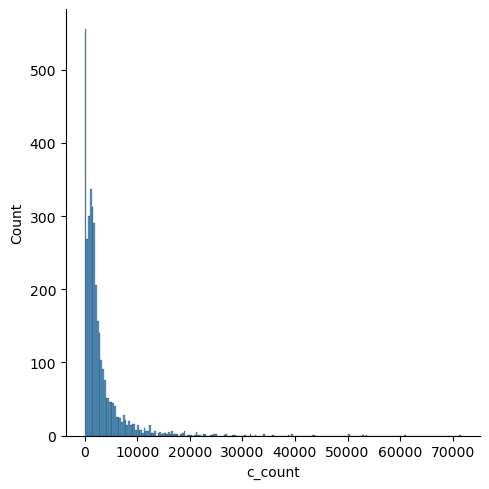

In [14]:
sns.displot(data=df_article,x='c_count')

In [15]:
df_article[df_article['c_count']<300]

,url,site,title,article,abstract,tags,paragraphs,date_iso,author,date,sm_date_text,text,c_count
278,https://www.polemia.com/en-finir-avec-le-fanta...,www.polemia.com,"En finir avec le fantasme égalitariste, par Ni...",Samedi 3 décembre 2022 avait lieu le 8e Forum ...,Samedi 3 décembre 2022 avait lieu le 8e Forum ...,"[Accueil, Société, égalitarisme, Forum de la D...",[Samedi 3 décembre 2022 avait lieu le 8e Forum...,,,,2022-12-14,"En finir avec le fantasme égalitariste, par Ni...",299
565,https://lesmoutonsrebelles.com/segolene-royal-...,lesmoutonsrebelles.com,Ségolène Royal a raison !,Invitée à la Télé pour parler de la crise en U...,,[],[Invitée à la Télé pour parler de la crise en ...,,,,2022-04-15,Ségolène Royal a raison !\nInvitée à la Télé p...,237
600,https://lesmoutonsrebelles.com/andre-bercoff-m...,lesmoutonsrebelles.com,André Bercoff – Macron réélu et florilège des ...,Cette vidéo est extraite de l’émission « Berco...,,[],[Cette vidéo est extraite de l’émission « Berc...,,,,2022-04-25,André Bercoff – Macron réélu et florilège des ...,288
682,https://lesmoutonsrebelles.com/pauvre-france-l...,lesmoutonsrebelles.com,« Pauvre France » la colère de Pascal Praud en...,"« Pauvre France ! », par Pascal Praud.«Pauvre ...",,[],"[« Pauvre France ! », par Pascal Praud., «Pauv...",,,,2022-05-27,« Pauvre France » la colère de Pascal Praud en...,212
720,https://lesmoutonsrebelles.com/la-derniere-vid...,lesmoutonsrebelles.com,La dernière vidéo du Pr. Raoult est une boucherie,La fin de l’hégémonie ? \n L’excellente vidéo ...,,[],[L’excellente vidéo de Raoult de cette semaine...,,,,2022-06-21,La dernière vidéo du Pr. Raoult est une bouche...,233
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3510,https://lemediaen442.fr/toulon-un-homme-se-pre...,lemediaen442.fr,Toulon : un homme se présente avec un obus dan...,Le Média en 4-4-2.,"Ragna-Rock : ""La partie pédiatrie de l'hôpital...","[Faits-divers, Humour, Société, Vidéos, ragnar...","[Le Média en 4-4-2., Karim imite fort bien un ...",2022-12-28T11:02:00+01:00,,28 décembre 2022,2022-12-28,Toulon : un homme se présente avec un obus dan...,115
3514,https://lemediaen442.fr/pourquoi-on-ne-celebre...,lemediaen442.fr,Pourquoi on ne célèbre pas Noël le 25 décembre...,Le Média en 4-4-2.,"Avec Diana, Russe native et professeur diplômé...","[Culture, Histoire, Société, Vidéos, russie]","[Le Média en 4-4-2., Cette vidéo diffusée sur ...",2022-12-28T17:31:29+01:00,,28 décembre 2022,2022-12-28,Pourquoi on ne célèbre pas Noël le 25 décembre...,77
3517,https://lemediaen442.fr/100-ans-de-cinema-aujo...,lemediaen442.fr,100 ans de cinéma : « Aujourd’hui mort… commen...,,"""Contre-histoire du cinéma"" s'attèle à faire r...","[Cinéma, Décryptage, Société, Vidéos, cinéma]",[Le film Reality 2.zero s'amuse des technologi...,2022-08-29T13:13:23+02:00,,29 août 2022,2022-12-29,100 ans de cinéma : « Aujourd’hui mort… commen...,82
3529,https://lemediaen442.fr/la-pire-annee-de-lhist...,lemediaen442.fr,La pire année de l’histoire de l’humanité : l’...,Le Média en 4-4-2.,L'année 536 a été qualifiée de « pire année de...,"[Histoire, Santé, Vidéos, covid-19]","[Le Média en 4-4-2., Pierre Chaillot nous expl...",2022-12-30T14:21:06+01:00,,30 décembre 2022,2022-12-30,La pire année de l’histoire de l’humanité : l’...,71


In [16]:
df_article['proba_infox']=predictor.predict_proba(df_article['text'])[:,1]

In [17]:
df_article['pred_infox']=predictor.predict(df_article['text'])

In [18]:
df_article[['proba_infox','pred_infox']].describe()

,proba_infox,pred_infox
count,3537.000000,3537.000000
mean,0.423584,0.369239
std,0.290696,0.482667
min,0.002318,0.000000
25%,0.173155,0.000000
50%,0.358397,0.000000
75%,0.660050,1.000000
max,0.999334,1.000000


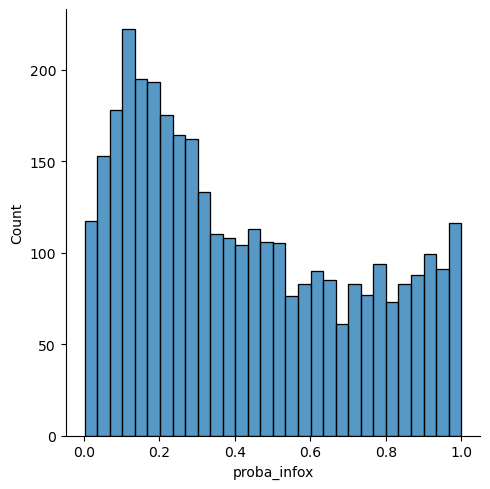

In [19]:
sns.displot(data=df_article,x='proba_infox',bins=30)

In [20]:
df_article.to_csv('data/tmp/230714-Barometre.csv',index=False,decimal=',')

# Conclusions
---

- Chargement de l'ensemble des pages
- Application prédicteur

# Bricolages
---